<a href="https://colab.research.google.com/github/ppreethi13/PIMA/blob/main/NNPIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # A button will appear to upload your file



Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Column names of the dataset
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the uploaded file with the exact name
data = pd.read_csv('pima-indians-diabetes.data.csv', header=None, names=column_names)

# Show first 5 rows to verify
print("First 5 rows of the data:")
print(data.head())

# Split data into input features (X) and output label (y)
X = data.iloc[:, :-1]  # all columns except last
y = data.iloc[:, -1]   # last column is the target label

# Split data into training set and testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features to have mean=0 and std=1 for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data loading and preprocessing done!")



First 5 rows of the data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Data loading and preprocessing done!


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple neural network model
model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),  # input layer with 8 features
    Dense(8, activation='relu'),                                    # hidden layer
    Dense(1, activation='sigmoid')                                  # output layer for binary prediction
])

# Compile the model: specify optimizer, loss function, and metrics to track
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on training data, show progress, validate on 20% of training data
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5637 - loss: 0.7167 - val_accuracy: 0.6260 - val_loss: 0.6684
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6367 - loss: 0.6441 - val_accuracy: 0.6423 - val_loss: 0.6281
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6627 - loss: 0.6101 - val_accuracy: 0.6504 - val_loss: 0.5965
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6659 - loss: 0.5952 - val_accuracy: 0.6911 - val_loss: 0.5728
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6988 - loss: 0.5446 - val_accuracy: 0.7073 - val_loss: 0.5576
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7532 - loss: 0.5203 - val_accuracy: 0.6829 - val_loss: 0.5352
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7680 - loss: 0.5154 - val_accuracy: 0.6992 - val_loss: 0.5212
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7770 - loss: 0.4833 - val_accuracy: 0.7073 - val_loss: 0.5154
Epo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7294 - loss: 0.5151 
Test Accuracy: 0.7468
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


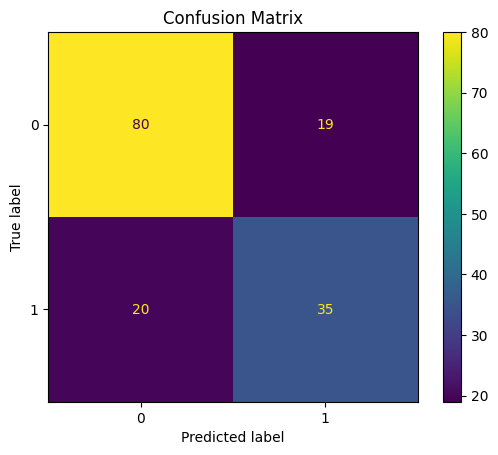

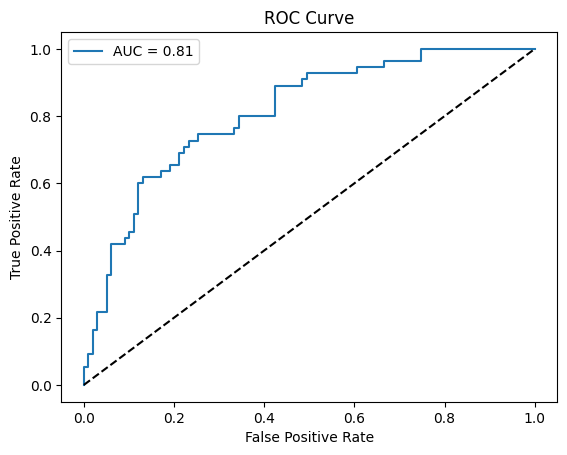

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict probabilities on test data
y_pred_prob = model.predict(X_test).ravel()

# Convert probabilities to class labels (0 or 1) with 0.5 threshold
y_pred = (y_pred_prob > 0.5).astype(int)

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random guess baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
